In [4]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [5]:
# load files
# - lear: lear_slog_sparsity_test_2_train.tsv
# - dear = dear_slog_sparsity_test_1_train.tsv
# each file is one column per line, containing a json object

with open('lear_slog_sparsity_test_3_train.tsv', 'r') as f:
    lear_lines = f.readlines()
with open('dear_slog_sparsity_test_3_train.tsv', 'r') as f:
    dear_lines = f.readlines()

lear_data = [json.loads(line.replace("'",'"')) for line in lear_lines]
dear_data = [json.loads(line.replace("'",'"')) for line in dear_lines]

print(f"LEAR data samples: {len(lear_data)}")
print(f"DEAR data samples: {len(dear_data)}")

LEAR data samples: 325720
DEAR data samples: 325720


In [6]:
# sample a line from each
print("Sample LEAR data:")
print(json.dumps(lear_data[0], indent=2))
print("\nSample DEAR data:")
print(json.dumps(dear_data[0], indent=2))

Sample LEAR data:
{
  "input": "the box was eaten",
  "sentence_len": 2,
  "gold": "* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )",
  "output": [
    "eat",
    "box",
    "None",
    "None"
  ],
  "processed_gold": [
    "eat",
    "None",
    "box",
    "None"
  ],
  "sample_num": 0,
  "composer_output": [
    [
      [
        0,
        3
      ],
      [
        [
          1,
          1
        ],
        [
          3,
          3
        ]
      ]
    ]
  ],
  "final_semantic": {
    "children": [
      {
        "children": [],
        "token": "box",
        "rel": "agent",
        "class": "E"
      }
    ],
    "token": "eat",
    "rel": "",
    "class": "P"
  },
  "c_reward": -1.0,
  "s_reward": -1.0
}

Sample DEAR data:
{
  "input": "the box was eaten",
  "sentence_len": 2,
  "gold": "* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )",
  "output": "eat(box,agent)",
  "processed_gold": "eat(box,theme)",
  "sample_num": 0,
  "c_reward": 1.0,
  "s_reward": 0.0
}


In [7]:
# turn data into pandas dataframe for easier analysis
lear_df = pd.DataFrame(lear_data)
dear_df = pd.DataFrame(dear_data)

dear_df

,input,sentence_len,gold,output,processed_gold,sample_num,c_reward,s_reward
0,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","eat(box,agent)","eat(box,theme)",0,1.000000,0.0
1,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","eat(box,agent)","eat(box,theme)",1,1.000000,0.0
2,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","box(eat,relcl) eat(box,recipient)","eat(box,theme)",2,0.666667,0.0
3,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","eat(box,theme)","eat(box,theme)",3,1.000000,1.0
4,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","eat(box,agent)","eat(box,theme)",4,1.000000,0.0
...,...,...,...,...,...,...,...,...
325715,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","paint(donut,theme) say(paint,ccomp) say(ava,ag...","say(ava,agent) say(paint,ccomp) paint(donut,th...",5,1.000000,1.0
325716,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","paint(donut,theme) say(paint,ccomp) say(ava,ag...","say(ava,agent) say(paint,ccomp) paint(donut,th...",6,1.000000,1.0
325717,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","paint(donut,theme) say(paint,ccomp) say(ava,ag...","say(ava,agent) say(paint,ccomp) paint(donut,th...",7,1.000000,1.0
325718,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","paint(donut,theme) say(paint,ccomp) say(ava,ag...","say(ava,agent) say(paint,ccomp) paint(donut,th...",8,1.000000,1.0


### LeAR: Catalan Number formula:

$$P_\text{LeAR}=\frac{(2n)!}{(n+1)!n!}$$

### DeAR: Exponential
$$P_\text{DeAR}=n^{n-2}$$

In [8]:
def catalan_number(n):
    if n == 0:
        return 1
    return sum(catalan_number(i) * catalan_number(n - 1 - i) for i in range(n))

def calc_pos_lear(n):
    return catalan_number(n-1)

def calc_pos_dear(n):
    return n**(n-2)


pos_lear = {}
pos_dear = {}
# save values 2 to 20
print("Sentence Length | LEAR Pos | DEAR Pos")
for i in range(2, 17):
    pos_lear[i] = calc_pos_lear(i)
    pos_dear[i] = calc_pos_dear(i)
    print(f"{i:15} | {pos_lear[i]:8,} | {pos_dear[i]:18,}")

Sentence Length | LEAR Pos | DEAR Pos
              2 |        1 |                  1
              3 |        2 |                  3
              4 |        5 |                 16
              5 |       14 |                125
              6 |       42 |              1,296
              7 |      132 |             16,807
              8 |      429 |            262,144
              9 |    1,430 |          4,782,969
             10 |    4,862 |        100,000,000
             11 |   16,796 |      2,357,947,691
             12 |   58,786 |     61,917,364,224
             13 |  208,012 |  1,792,160,394,037
             14 |  742,900 | 56,693,912,375,296
             15 | 2,674,440 | 1,946,195,068,359,375
             16 | 9,694,845 | 72,057,594,037,927,936


In [9]:
lear_df['final_semantic'][0]

{'children': [{'children': [], 'token': 'box', 'rel': 'agent', 'class': 'E'}],
 'token': 'eat',
 'rel': '',
 'class': 'P'}

In [10]:
# Take process_gold method from DeAR

def process_gold(s):
    # Examples:
    # * cake ( x _ 8 ) ; cat ( x _ 1 ) AND cat . nmod ( x _ 1 , x _ 3 ) AND admire . agent ( x _ 3 , x _ 1 ) AND admire . ccomp ( x _ 3 , x _ 6 ) AND eat . agent ( x _ 6 , Emily ) AND eat . theme ( x _ 6 , x _ 8 )
    # * muffin ( x _ 4 ) ; * painting ( x _ 7 ) ; * girl ( x _ 10 ) ; mail . recipient ( x _ 2 , Emma ) AND mail . theme ( x _ 2 , x _ 4 ) AND mail . agent ( x _ 2 , x _ 10 ) AND muffin . nmod . beside ( x _ 4 , x _ 7 )

    # each edge will be a triplet of form (hed, dep, rel_name)
    # a predicate -> entity relation will look like (8, 1, "agent") (agent, theme, recipient)
    # a predicate -> predicate relation will look like (8, 6, "ccomp") (ccomp, xcomp)
    # an entity -> predicate relation will look like (1, 3, "relcl")
    # an entity -> entity relation will look like (1, 3, "in") (in, on, beside)
    edges = []
    variable_map = {}
    
    elements = s.replace(" and ", ";").split(";")
    for element in elements:
        # if there is an nmod, it can either be an nmod (if there is a preposition) or a relcl (if there is no preposition)
        # check for nmod first
        if ". nmod ." in element:
            # cake.nmod.on.x_4.x_7
            nmod = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            nmod = nmod.split(".")
            variable_map[nmod[3]] = nmod[0]
            nmod = nmod[-3:]
            # [on, x_4, x_7]
            nmod = [nmod[1], nmod[2], nmod[0]]
            nmod = [el.replace("x_", "") for el in nmod]
            # [4, 7, on]
            edges.append(nmod)

        # next, relcl
        elif ". nmod" in element:
            # cake.nmod.x_4.x_7
            relcl = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            relcl = relcl.split(".")
            variable_map[relcl[2]] = relcl[0]
            relcl = relcl[-2:]
            # [x_4, x_7]
            relcl = [el.replace("x_", "") for el in relcl] + ["relcl"]
            # [4, 7, relcl]
            edges.append(relcl)

        # else, if there is a comma, it is a predicate
        elif ',' in element:
            # study . agent ( x _ 2 , x _ 1 )
            predicate = element.replace(" ", "").replace("(",".").replace(")","").replace(",",".")
            # study.agent.x_2.x_1
            predicate = predicate.split(".")
            variable_map[predicate[2]] = predicate[0]
            predicate = predicate[-3:]
            # [agent, x_2, x_1]
            predicate = [predicate[1], predicate[2], predicate[0]]
            # [x_2, x_1, agent]
            predicate = [el.replace("x_", "") for el in predicate]
            # [2, 1, agent]
            edges.append(predicate)
            
        # if there is no comma, it is an entity, which we capture in variable_map
        else:
            # cake ( x _ 8 ) or * cake ( x _ 8 )
            element = element.replace(" ", "").replace("(",".").replace(")","").replace("*", "")
            # cake.x_8
            element = element.split(".")
            variable_map[element[1]] = element[0]

    # Now we go through the edges and replace the entities with their corresponding variables
    for i in range(len(edges)):
        for j in range(2):
            if edges[i][j].isnumeric():
                assert "x_" + edges[i][j] in variable_map, f"Entity {edges[i][j]} not found in variable_map: {variable_map}"
                edges[i][j] = variable_map["x_" + edges[i][j]]

    debug_info = {
        "elements": elements,
        "variable_map": variable_map
    }
    return edges#, debug_info

# and create a new field in both dear_df and lear_df that processed the 'gold' field
lear_df['processed_gold'] = lear_df['gold'].apply(process_gold)
dear_df['processed_gold'] = dear_df['gold'].apply(process_gold)

In [11]:
dear_df['processed_gold'][0]

[['eat', 'box', 'theme']]

In [12]:
lear_df['final_semantic'][0]

{'children': [{'children': [], 'token': 'box', 'rel': 'agent', 'class': 'E'}],
 'token': 'eat',
 'rel': '',
 'class': 'P'}

In [13]:
def process_lear_semantic(sem_json):
    """Process a json string representing the final_semantic field in LEAR data.
    Each object in the json has the attributes 'class', 'rel', 'token', and 'children'. Children is a list of similar objects.
    We want to extract edges of the form (head, dependent, relation) from this tree structure.
    """
    edges = []

    def extract_edges(node):
        if 'children' in node:
            for child in node['children']:
                edges.append((node['token'], child['token'], child['rel']))
                extract_edges(child)

    extract_edges(sem_json)

    return edges

# now we use the newly created process_lear_semantic function to create a new field in lear_df
lear_df['processed_lear_semantic'] = lear_df['final_semantic'].apply(process_lear_semantic)
lear_df['processed_lear_semantic'][0]

[('eat', 'box', 'agent')]

In [14]:
# now we use the newly processed semantic to calculate a reward
def get_reward(pred_edges, gold_edges):
    # flatten into strings for easy set ops
    gold_unlab = {f"{h}|{d}" for h, d, _ in gold_edges}
    pred_unlab = {f"{h}|{d}" for h, d, _ in pred_edges}
    gold_lab = {f"{h}|{d}|{r}" for h, d, r in gold_edges}
    pred_lab = {f"{h}|{d}|{r}" for h, d, r in pred_edges}

    # For composer: precision, recall, and F1 over unlabelled edges
    correct_unlab = pred_unlab & gold_unlab
    prec = len(correct_unlab) / len(pred_unlab) if pred_unlab else 0
    rec = len(correct_unlab) / len(gold_unlab) if gold_unlab else 0
    comp_f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0

    # For solver: accuracy of labels *on correctly predicted edges only*
    correct_lab = pred_lab & gold_lab
    solv_reward = len(correct_lab) / len(correct_unlab) if correct_unlab else 0

    return comp_f1, solv_reward

lear_df['c_reward'], lear_df['s_reward'] = zip(*lear_df.apply(lambda row: get_reward(row['processed_lear_semantic'], row['processed_gold']), axis=1))

lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic
0,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",0,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]"
1,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, None, box, None]","[[eat, box, theme]]",1,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,1.0,"[(eat, box, theme)]"
2,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, None, box, None]","[[eat, box, theme]]",2,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,1.0,"[(eat, box, theme)]"
3,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",3,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]"
4,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",4,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]"


In [15]:
dear_df['possible_trees'] = dear_df['sentence_len'].apply(lambda n: pos_dear[n] if n in pos_dear else None)
lear_df['possible_trees'] = lear_df['sentence_len'].apply(lambda n: pos_lear[n] if n in pos_lear else None)
lear_df.head()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees
0,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",0,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]",1
1,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, None, box, None]","[[eat, box, theme]]",1,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,1.0,"[(eat, box, theme)]",1
2,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, None, box, None]","[[eat, box, theme]]",2,"[[[0, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,1.0,"[(eat, box, theme)]",1
3,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",3,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]",1
4,the box was eaten,2,"* box ( x _ 1 ) ; eat . theme ( x _ 3 , x _ 1 )","[eat, box, None, None]","[[eat, box, theme]]",4,"[[[1, 3], [[1, 1], [3, 3]]]]","{'children': [{'children': [], 'token': 'box',...",1.0,0.0,"[(eat, box, agent)]",1


In [16]:
lear_df.tail()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees
325715,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",5,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5
325716,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",6,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5
325717,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",7,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5
325718,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",8,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5
325719,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",9,"[[[4, 6], [[4, 4], [6, 6]]], [[0, 1], [[0, 0],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5


In [17]:

def anon_dear_output(s):
    # outputs look like: 'observe(rose,theme) rose(emma,on)'
    # we need: observe(rose) rose(emma)
    edges = s.replace('(',',').replace(')','').split(' ')
    edges = [edge.split(',') for edge in edges]
    edges = [f"{edge[0]}({edge[1]})" for edge in edges]
    return ' '.join(edges)

#test

dear_df['anon_output'] = dear_df['output'].apply(anon_dear_output)

In [18]:
def anon_lear_output(s):
    # outputs look like: [(admire, dog, agent), (admire, melon, recipie...	
    # we need '(admire, dog) (admire, melon)...'
    arr = [f"({h}, {d})" for h, d, r in s]
    return ' '.join(sorted(arr))

lear_df['anon_output'] = lear_df['processed_lear_semantic'].apply(anon_lear_output)
lear_df.tail()

,input,sentence_len,gold,output,processed_gold,sample_num,composer_output,final_semantic,c_reward,s_reward,processed_lear_semantic,possible_trees,anon_output
325715,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",5,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5,"(paint, donut) (say, ava) (say, paint)"
325716,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",6,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5,"(paint, donut) (say, ava) (say, paint)"
325717,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",7,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5,"(paint, donut) (say, ava) (say, paint)"
325718,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",8,"[[[0, 1], [[0, 0], [1, 1]]], [[4, 6], [[4, 4],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5,"(paint, donut) (say, ava) (say, paint)"
325719,ava said that a donut was painted,4,"say . agent ( x _ 1 , ava ) and say . ccomp ( ...","[say, ava, None, None, ccomp, paint, None, don...","[[say, ava, agent], [say, paint, ccomp], [pain...",9,"[[[4, 6], [[4, 4], [6, 6]]], [[0, 1], [[0, 0],...","{'children': [{'children': [], 'token': 'ava',...",1.0,1.0,"[(say, ava, agent), (say, paint, ccomp), (pain...",5,"(paint, donut) (say, ava) (say, paint)"


In [20]:
# each value of column "input" has 15 rows, corresponding to each of the monte carlo samples.


# Add a group index to preserve original order
lear_df['group_idx'] = lear_df.groupby('input', sort=True).ngroup()
dear_df['group_idx'] = dear_df.groupby('input', sort=True).ngroup()
lear_avg = lear_df.groupby('input', sort=False).agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first',
    'possible_trees': 'first',
    'group_idx': 'first'
}).reset_index()
lear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len', 'possible_trees', 'group_idx']

dear_avg = dear_df.groupby('input').agg({
    'c_reward': ['mean', 'max', 'min'],
    's_reward': 'mean',
    'sentence_len': 'first',
    'possible_trees': 'first',
    'group_idx': 'first'
}).reset_index()
dear_avg.columns = ['input', 'c_reward', 'c_reward_max', 'c_reward_min', 's_reward', 'sentence_len', 'possible_trees', 'group_idx']

# add a row_num column to each
lear_avg['row_num'] = range(len(lear_avg))
dear_avg['row_num'] = range(len(dear_avg))

# Add "sparsity" field: proportion of c_rewards == 0 for each input group

def calc_sparsity(group):
    return (group['c_reward'] == 0).sum() / len(group)

lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')

# Merge sparsity into avg dataframes
lear_avg = pd.merge(lear_avg, lear_sparsity, on='input')
dear_avg = pd.merge(dear_avg, dear_sparsity, on='input')

# 2) compute unique tree counts per input
lear_diversity = (lear_df
                  .groupby('input')['anon_output']
                  .nunique()
                  .reset_index(name='trees_explored'))

# (fix possible typo in your original code — you used anon_output for dear)
dear_diversity = (dear_df
                  .groupby('input')['anon_output']
                  .nunique()
                  .reset_index(name='trees_explored'))



# optional: fraction of samples that are unique (out of 15)
lear_diversity['diversity'] = lear_diversity['trees_explored'] / 15
dear_diversity['diversity'] = dear_diversity['trees_explored'] / 15

# 3) merge WITH lear_avg (do NOT divide series from different frames by position)
lear_avg = pd.merge(lear_avg, lear_diversity, on='input', how='left')
dear_avg = pd.merge(dear_avg, dear_diversity, on='input', how='left')

# 4) compute proportion relative to possible_trees, guard divide-by-zero
lear_avg['prop'] = lear_avg['trees_explored'] / lear_avg['possible_trees'].replace({0: np.nan})
dear_avg['prop'] = dear_avg['trees_explored'] / dear_avg['possible_trees'].replace({0: np.nan})

lear_avg

C:\Users\joaqu\AppData\Local\Temp\ipykernel_3488\4173915571.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lear_sparsity = lear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_3488\4173915571.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dear_sparsity = dear_df.groupby('input').apply(calc_sparsity).reset_index(name='sparsity')


,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,trees_explored,diversity,prop
0,the box was eaten,1.000000,1.000000,1.000000,0.200000,2,1,20749,0,0.0,1,0.066667,1.000000
1,a melon was admired by the dog,1.000000,1.000000,1.000000,0.450000,3,2,7568,1,0.0,1,0.066667,0.500000
2,a tourist liked that a cake was rolled by olivia,0.825000,1.000000,0.500000,0.366667,5,14,9611,2,0.0,4,0.266667,0.285714
3,a professor thought that the cat sneezed,0.966667,1.000000,0.666667,0.533333,4,5,8515,3,0.0,2,0.133333,0.400000
4,the chicken smirked,1.000000,1.000000,1.000000,0.300000,2,1,23287,4,0.0,1,0.066667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32567,olivia liked that emma adored a girl,1.000000,1.000000,1.000000,1.000000,5,14,18974,32567,0.0,1,0.066667,0.071429
32568,a giraffe gave the sandwich to a girl,1.000000,1.000000,1.000000,1.000000,4,5,5361,32568,0.0,1,0.066667,0.200000
32569,the boy changed the girl that victoria ate,0.666667,0.666667,0.666667,1.000000,5,14,20984,32569,0.0,1,0.066667,0.071429
32570,the child helped the donut that emma valued,0.666667,0.666667,0.666667,0.966667,5,14,23378,32570,0.0,2,0.133333,0.142857


In [26]:
dear_avg['sentence_len'].value_counts().sort_index()

sentence_len
2      4058
3     11902
4      7447
5      5455
6      1938
7      1035
8       316
9        57
10       95
11      232
12       27
13       10
Name: count, dtype: int64

In [63]:
# whenever prop > 1, set to 1, and set trees_explored to possible_trees
dear_avg.loc[dear_avg['prop'] > 1, 'prop'] = 1
dear_avg.loc[dear_avg['prop'] > 1, 'trees_explored'] = dear_avg['possible_trees']
dear_avg[dear_avg['prop'] > 1]

,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,trees_explored,diversity,prop,bin


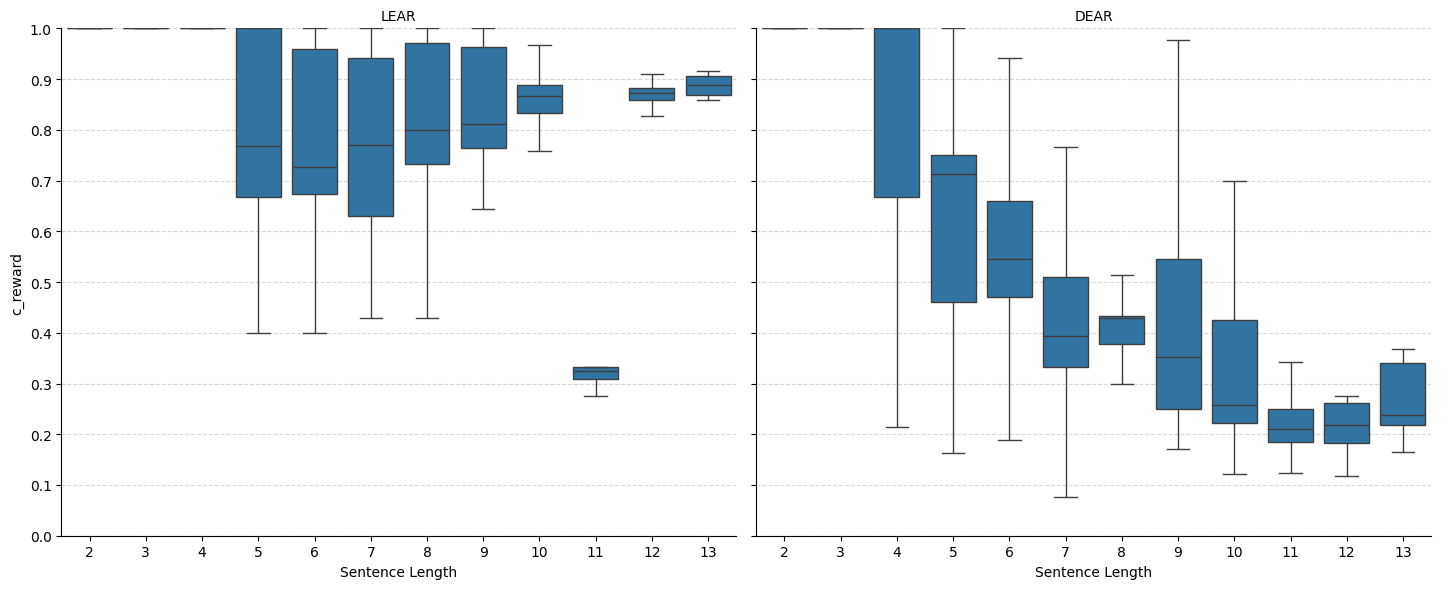

In [64]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'c_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'c_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='c_reward',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Sentence Length", "c_reward")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





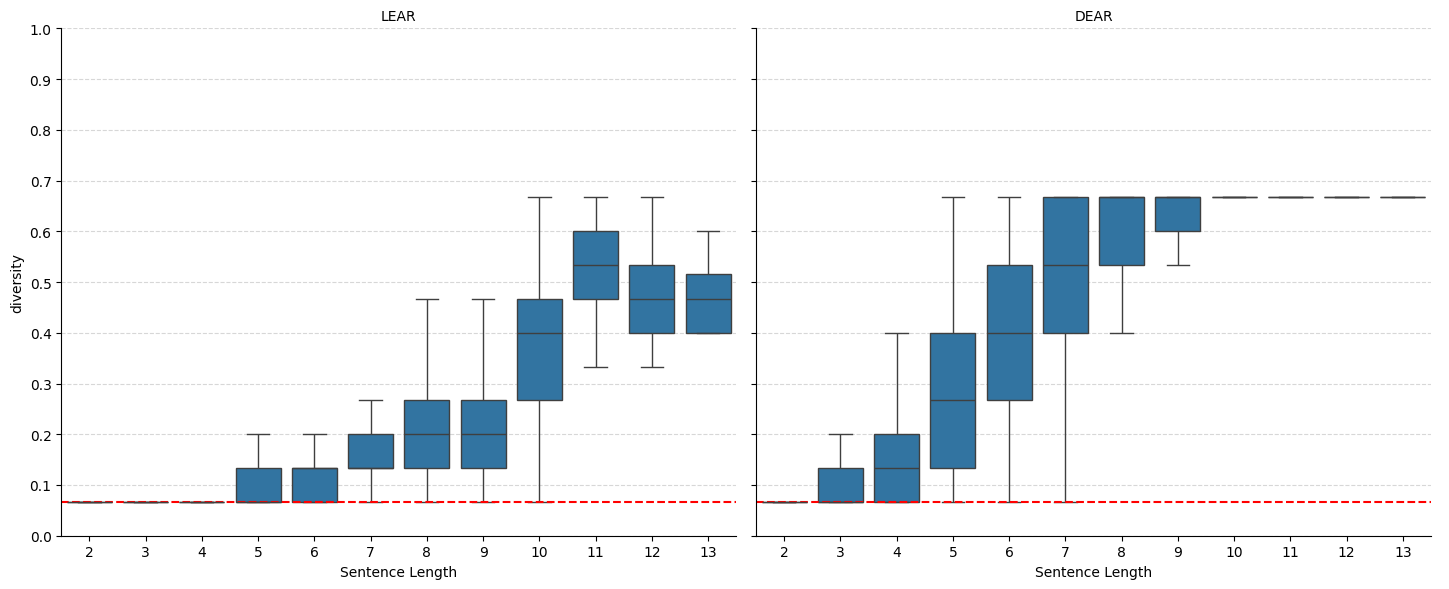

In [79]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'diversity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'diversity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='diversity',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)


g.set_axis_labels("Sentence Length", "diversity")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)
    # create horizontal line at 1/15
    ax.axhline(1/15, color='red', linestyle='--', label='1/15')
    ax.set_yticks([n*0.1 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





In [2]:
# Create long-form DataFrame
lear_long = lear_avg[['sentence_len', 'prop']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_avg[['sentence_len', 'prop']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.catplot(
    data=df,
    x='sentence_len',
    y='prop',
    col='method',
    kind='box',
    showcaps=True,
    showfliers=False,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Sentence Length", "prop")
g.set_titles("{col_name}")
plt.yscale('log')
plt.tight_layout()
plt.show()





NameError: name 'lear_avg' is not defined

In [ ]:
dear_avg[dear_avg['sentence_len'] == 3]

,input,c_reward,c_reward_max,c_reward_min,s_reward,sentence_len,possible_trees,group_idx,row_num,sparsity,trees_explored,diversity,prop,bin
8,a baby ate ava,1.00,1.0,1.0,0.95,3,3,8,8,0.0,1,0.066667,0.333333,0
10,a baby ate the jar,1.00,1.0,1.0,1.00,3,3,10,10,0.0,1,0.066667,0.333333,0
20,a baby called the girl,1.00,1.0,1.0,1.00,3,3,20,20,0.0,1,0.066667,0.333333,0
25,a baby craved to paint,0.98,1.0,0.8,0.95,3,3,25,25,0.0,3,0.200000,1.000000,0
26,a baby craved to read,1.00,1.0,1.0,1.00,3,3,26,26,0.0,2,0.133333,0.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,zoey found mia,1.00,1.0,1.0,1.00,3,3,32551,32551,0.0,2,0.133333,0.666667,65
32552,zoey froze a shirt,0.95,1.0,0.5,1.00,3,3,32552,32552,0.0,2,0.133333,0.666667,65
32568,zoey wanted to walk,1.00,1.0,1.0,1.00,3,3,32568,32568,0.0,1,0.066667,0.333333,65
32570,zoey was rented a cookie,1.00,1.0,1.0,0.80,3,3,32570,32570,0.0,2,0.133333,0.666667,65


In [ ]:
print(f'DeAR Sparsity Mean: {dear_avg['sparsity'].mean()}')
print(f"DeAR Sparsity std: {dear_avg['sparsity'].std()}")
print(f'DeAR Diversity Mean: {dear_avg['diversity'].mean()}')
print(f'DeAR Diversity std: {dear_avg['diversity'].std()}')
print(f'DeAR Diversity Prop Mean: {dear_avg['prop'].mean()}')
print(f'DeAR Diversity Prop std: {dear_avg['prop'].std()}')
print(f'DeAR Diversity Prop Max: {dear_avg['prop'].max()}')
print(f'DeAR Diversity Prop Min: {dear_avg['prop'].min()}')
print('')
print(f'LEAR Sparsity Mean: {lear_avg['sparsity'].mean()}')
print(f"LEAR Sparsity std: {lear_avg['sparsity'].std()}")
print(f'LEAR Diversity Mean: {lear_avg['diversity'].mean()}')
print(f'LEAR Diversity std: {lear_avg['diversity'].std()}')
print(f'LEAR Diversity Prop Mean: {lear_avg['prop'].mean()}')
print(f'LEAR Diversity Prop std: {lear_avg['prop'].std()}')
print(f'LEAR Diversity Prop Max: {lear_avg['prop'].max()}')
print(f'LEAR Diversity Prop Min: {lear_avg['prop'].min()}')


DeAR Sparsity Mean: 0.0015811126120594376
DeAR Sparsity std: 0.01992322981951672
DeAR Diversity Mean: 0.1931126939293463
DeAR Diversity std: 0.17663249156004615
DeAR Diversity Prop Mean: 0.34226386556974087
DeAR Diversity Prop std: 0.3404608878856599
DeAR Diversity Prop Max: 1.0
DeAR Diversity Prop Min: 5.5798577143389016e-12

LEAR Sparsity Mean: 0.003070121576814442
LEAR Sparsity std: 0.05532440600936597
LEAR Diversity Mean: 0.08586106676491057
LEAR Diversity std: 0.061756618531780196
LEAR Diversity Prop Mean: 0.3790214909160532
LEAR Diversity Prop std: 0.29587925593780173
LEAR Diversity Prop Max: 1.0
LEAR Diversity Prop Min: 2.8844489740976482e-05


In [34]:
# Bin the data into groups of 10 rows by row_num and average c_reward, c_reward_min, c_reward_max
bin_size = 250
dear_avg['bin'] = dear_avg['row_num'] // bin_size
lear_avg['bin'] = lear_avg['row_num'] // bin_size

dear_binned = dear_avg.groupby('bin').agg({
    'c_reward': 'mean',
    'c_reward_min': 'mean',
    'c_reward_max': 'mean',
    'sparsity': 'mean',
    'diversity': 'mean',
    'prop': 'mean'
}).reset_index()

lear_binned = lear_avg.groupby('bin').agg({
    'c_reward': 'mean',
    'c_reward_min': 'mean',
    'c_reward_max': 'mean',
    'sparsity': 'mean',
    'diversity': 'mean',
    'prop': 'mean'
}).reset_index()

lear_binned


,bin,c_reward,c_reward_min,c_reward_max,sparsity,diversity,prop
0,0,0.845671,0.757084,0.915168,0.004000,0.147733,0.439837
1,1,0.868532,0.806201,0.904097,0.000000,0.127467,0.374654
2,2,0.879112,0.829869,0.916167,0.008000,0.118400,0.426558
3,3,0.877391,0.825749,0.917960,0.004000,0.114667,0.419117
4,4,0.876943,0.841040,0.911435,0.004000,0.103200,0.407454
...,...,...,...,...,...,...,...
126,126,0.923782,0.904110,0.930273,0.000000,0.078933,0.378249
127,127,0.919229,0.902760,0.926938,0.000000,0.082667,0.370378
128,128,0.926079,0.905378,0.930107,0.004000,0.079467,0.387012
129,129,0.923208,0.909690,0.927680,0.000000,0.077067,0.369946


In [35]:
dear_binned

,bin,c_reward,c_reward_min,c_reward_max,sparsity,diversity,prop
0,0,0.818018,0.778114,0.846886,0.003200,0.218933,0.357812
1,1,0.931687,0.912585,0.949662,0.000000,0.128000,0.579502
2,2,0.914981,0.886538,0.938437,0.000000,0.147467,0.627168
3,3,0.967306,0.958216,0.980157,0.000000,0.112000,0.490291
4,4,0.774106,0.738667,0.805792,0.000400,0.225867,0.246362
...,...,...,...,...,...,...,...
126,126,0.973000,0.946800,0.998400,0.000000,0.110133,0.550667
127,127,0.978360,0.950400,0.996400,0.000000,0.098133,0.490667
128,128,0.897235,0.859020,0.924612,0.000000,0.158133,0.442185
129,129,0.755105,0.702483,0.797686,0.002800,0.248267,0.214894


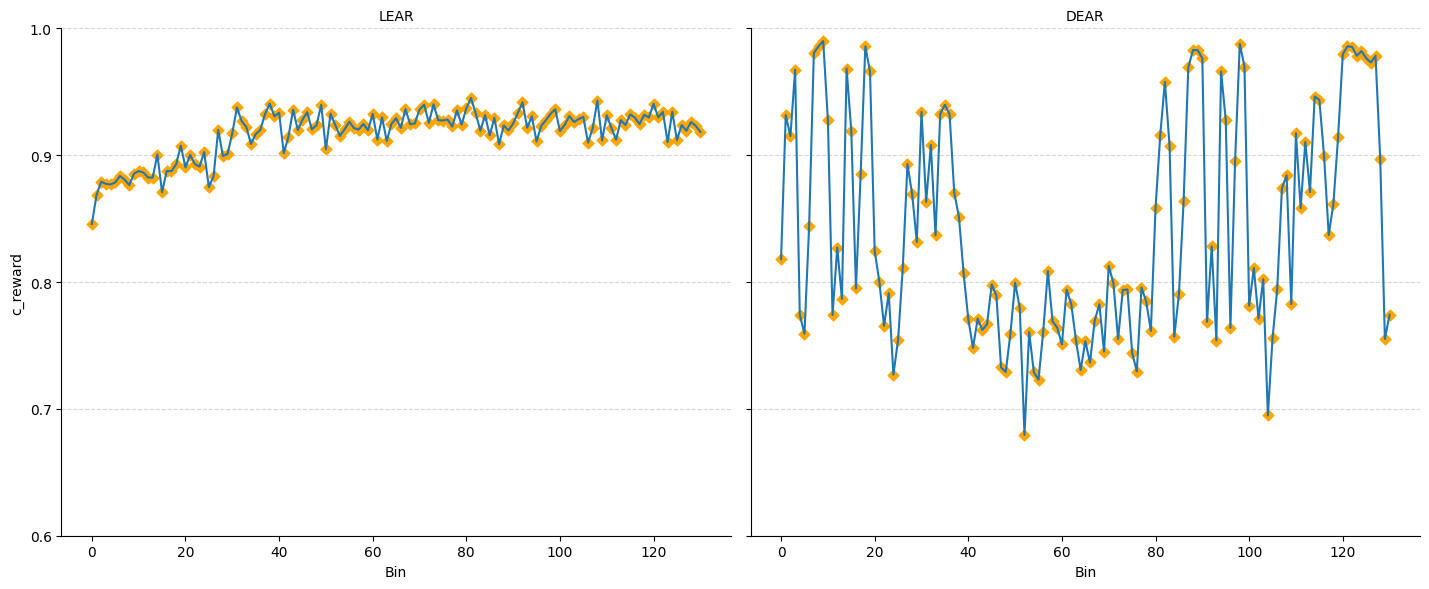

In [36]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'c_reward']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'c_reward']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='c_reward',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "c_reward")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['c_reward'], marker='D', color='orange', s=30, label='Data point')
    ax.set_ylim(0.6, 1)
    ax.set_yticks([n*0.1 for n in range(6, 11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

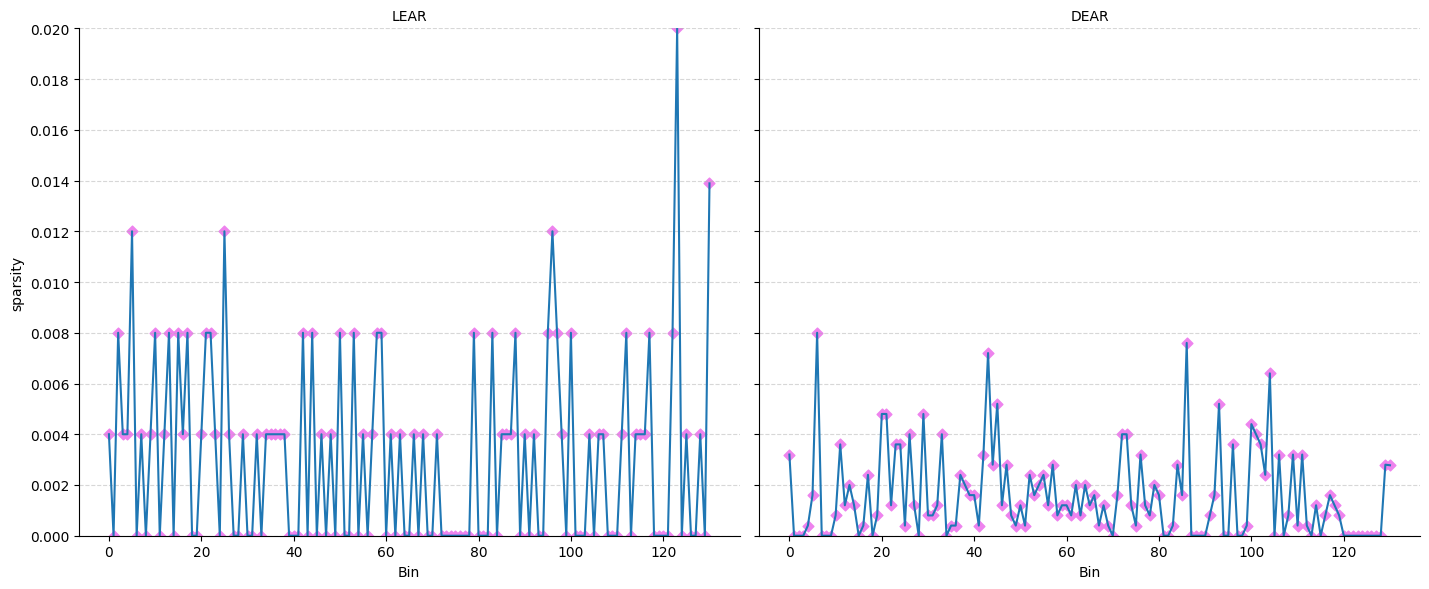

In [37]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'sparsity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'sparsity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='sparsity',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "sparsity")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['sparsity'], marker='D', color='violet', s=30, label='Data point')
    ax.set_ylim(0, 0.02)
    ax.set_yticks([n*0.002 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

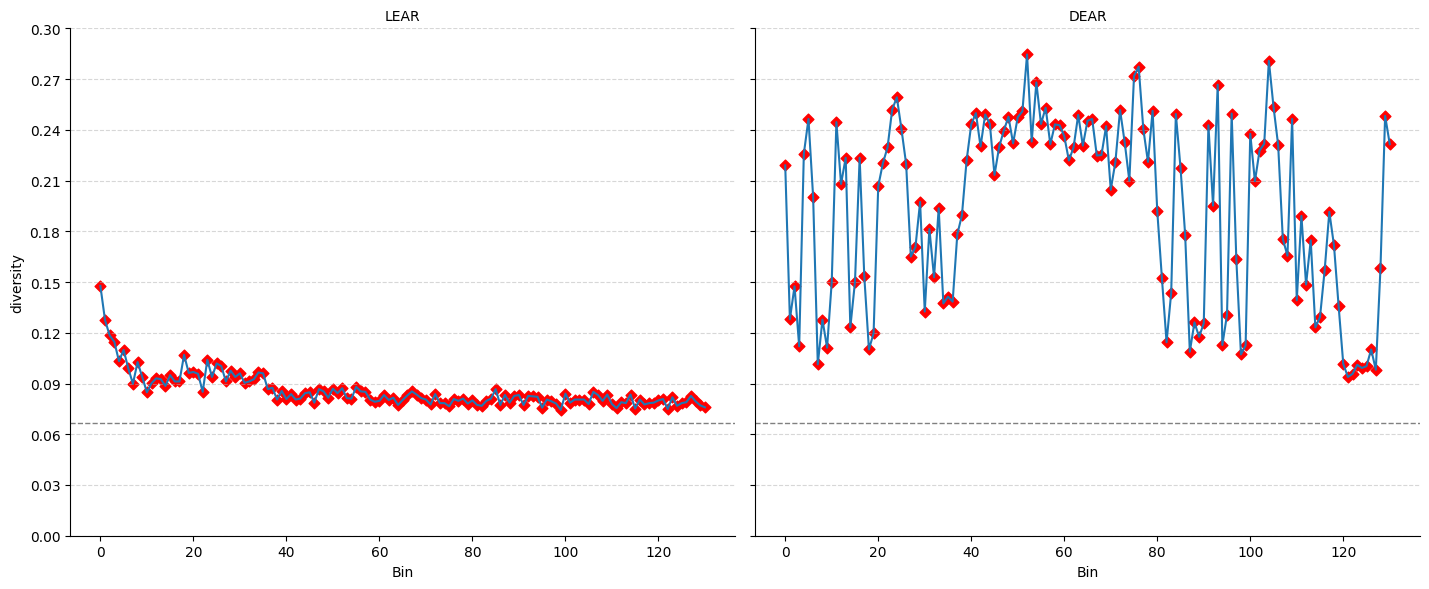

In [38]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'diversity']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'diversity']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='diversity',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)


g.set_axis_labels("Bin", "diversity")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.axhline(1/15, color='gray', linestyle='--', linewidth=1, label='1/15')
    ax.scatter(subset['bin'], subset['diversity'], marker='D', color='red', s=30, label='Data point')
    ax.set_ylim(0, 0.3)
    ax.set_yticks([n*0.03 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

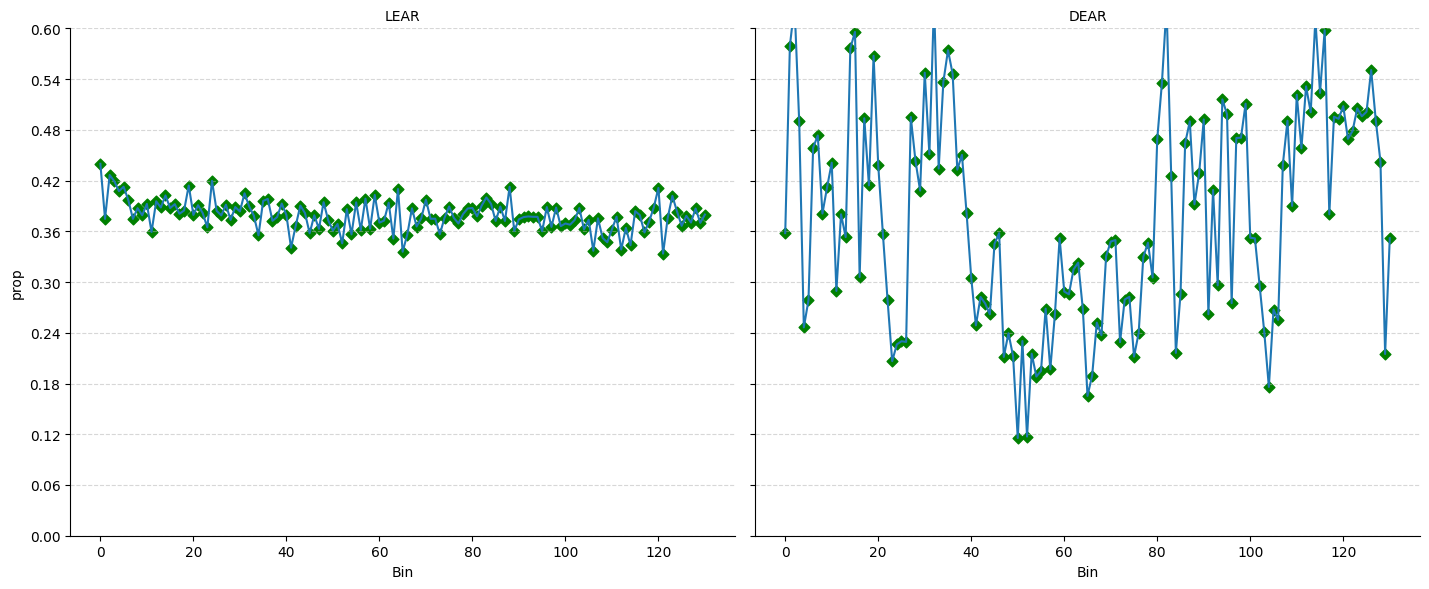

In [39]:
# Create long-form DataFrame
lear_long = lear_binned[['bin', 'prop']].copy()
lear_long['method'] = 'LEAR'
dear_long = dear_binned[['bin', 'prop']].copy()
dear_long['method'] = 'DEAR'
df = pd.concat([lear_long, dear_long], ignore_index=True)

g = sns.relplot(
    data=df,
    x='bin',
    y='prop',
    col='method',
    kind='line',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Bin", "prop")
g.set_titles("{col_name}")
for ax, method in zip(g.axes.flat, df['method'].unique()):
    # Add orange diamond markers to each datapoint
    subset = df[df['method'] == method]
    ax.scatter(subset['bin'], subset['prop'], marker='D', color='green', s=30, label='Data point')
    ax.set_ylim(0, 0.6)
    ax.set_yticks([n*0.06 for n in range(11)])
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [40]:
dear_avg[['sentence_len', 'possible_trees', 'sparsity', 'trees_explored', 'diversity', 'prop']]

,sentence_len,possible_trees,sparsity,trees_explored,diversity,prop
0,7,16807,0.0,10,0.666667,0.000595
1,7,16807,0.0,5,0.333333,0.000297
2,5,125,0.0,3,0.200000,0.024000
3,4,16,0.0,3,0.200000,0.187500
4,5,125,0.0,4,0.266667,0.032000
...,...,...,...,...,...,...
32567,2,1,0.0,1,0.066667,1.000000
32568,3,3,0.0,1,0.066667,0.333333
32569,5,125,0.0,2,0.133333,0.016000
32570,3,3,0.0,2,0.133333,0.666667
